# **BigMart Sales Prediction**

* Problem Definition: The data scientists at BigMart have collected 2013 sales
data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales.
* Business Goal: Using this model, it will be possible for Bigmart to understand the properties of products and outlets which in turn, will help in increasing the sales.
* We will build a predictive model using regression techniques to predict the sales of each product at a particular outlet.



Data Information
*   Item_Identifier: Unique product ID
*   Item_Weight: Weight of product
*   Item_Fat_Content: Whether the product is low fat or not
*   Item_Visibility: The % of total display area of all products in a store allocated to the particular product
*   Item_Type: The category to which the product belongs
*   Item_MRP: Maximum Retail Price (list price) of the product
*   Outlet_Identifier: Unique store ID
*   Outlet_Establishment_Year: The year in which store was established
*   Outlet_Size: The size of the store in terms of ground area covered
*   Outlet_Location_Type: The type of city in which the store is located
*   Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
*   Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/csv_nbks/dataBM.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
## Get a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
## Generate descriptive statistics.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
## Check dataframe dimensions
df.shape

(8523, 12)

In [8]:
df["Outlet_Establishment_Year"].value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [9]:
## Change datatype from int64 to category
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')

## Handling missing values

In [10]:
## Check for null values
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<Axes: >

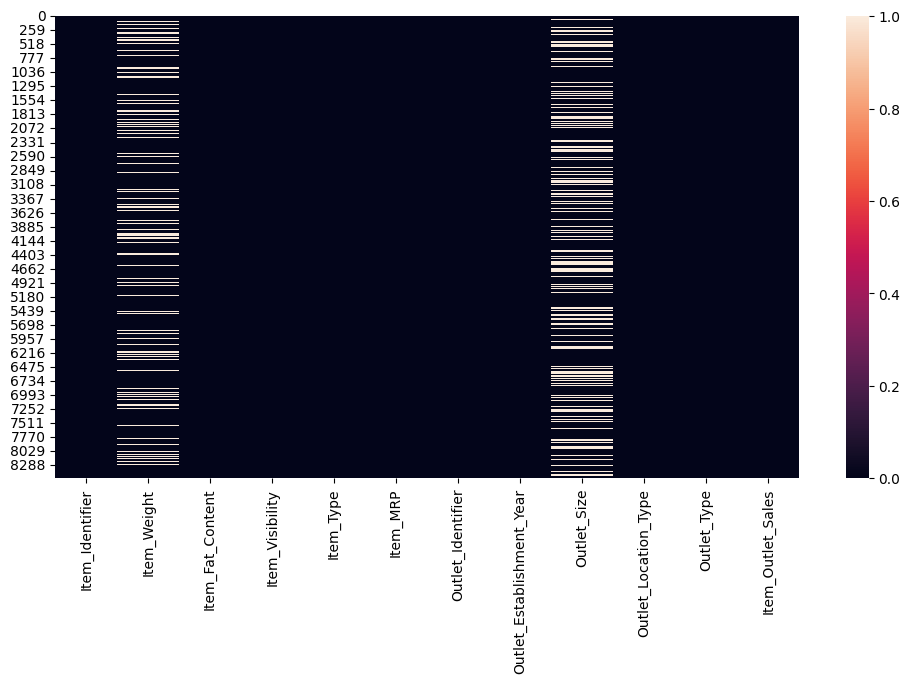

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [12]:
## Create numerical feature's dataframe
df_num=df.select_dtypes(["int64","float64"])
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


## Checking skewness value for numerical column

In [13]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_num.columns:
    s=stats.skew(df_num[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [14]:
right_skewed

{'Item_Visibility': 1.17, 'Item_MRP': 0.13, 'Item_Outlet_Sales': 1.18}

In [15]:
left_skewed

{}

In [16]:
normal

{'Item_Weight': nan}

<Axes: xlabel='Item_Weight', ylabel='Density'>

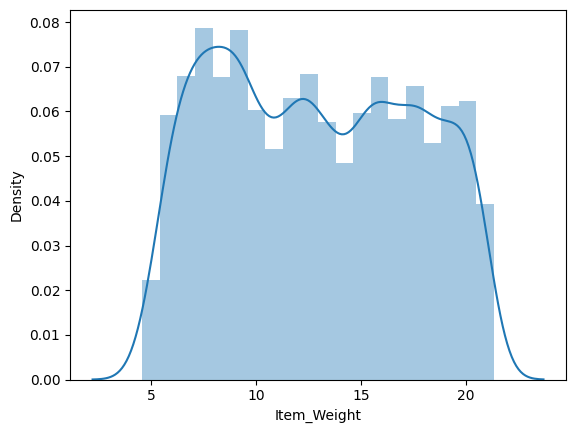

In [17]:
sns.distplot(df_num["Item_Weight"])

In [18]:
## As item_weight feature having almost normal distribution use mean imputation
df_num["Item_Weight"].fillna(df_num["Item_Weight"].mean(),inplace = True)

In [19]:
df_num.isnull().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Item_Outlet_Sales,0


In [20]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [21]:
## Create categorical feature's dataframe
df_cat=df.select_dtypes(["object","category"])
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [22]:
df_cat.shape

(8523, 8)

In [23]:
df_cat["Item_Identifier"].nunique()

1559

In [24]:
df_cat["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [25]:
## Replace low fat/LF with Low Fat and reg with Regular
df_cat["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)

In [26]:
df_cat["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [27]:
df_cat["Item_Type"].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [28]:
df_cat["Outlet_Identifier"].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [29]:
df_cat["Outlet_Size"].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [30]:
df_cat["Outlet_Location_Type"].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [31]:
df_cat.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [32]:
df_cat["Outlet_Size"].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [33]:
## Use mode imputation for outlet_size feature
df_cat["Outlet_Size"].fillna(df_cat["Outlet_Size"].mode()[0],inplace=True)

In [34]:
df_cat.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [35]:
df=pd.concat([df_num,df_cat],axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,3735.1380,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,443.4228,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,2097.2700,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,994.7052,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


## EDA

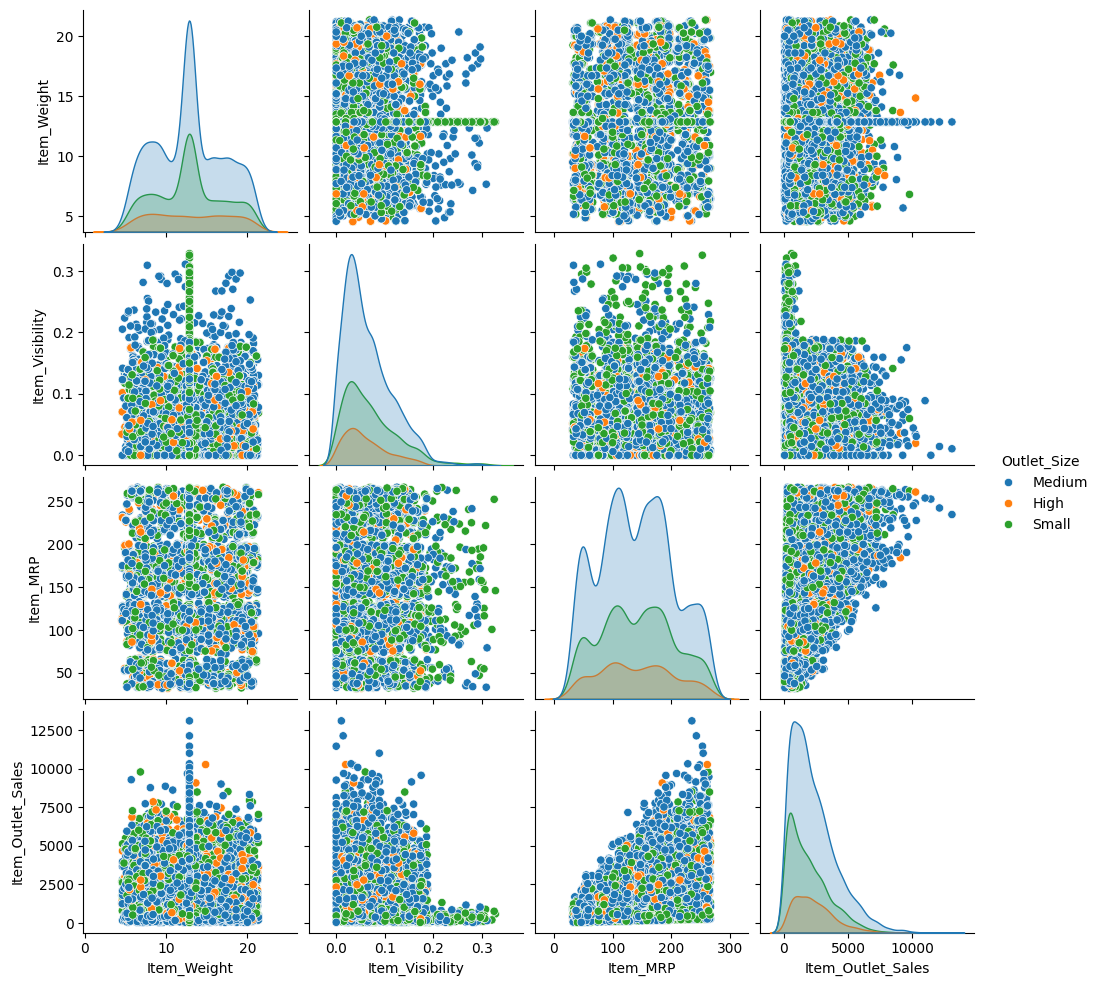

In [36]:
sns.pairplot(data=df,hue="Outlet_Size")

Text(0.5, 1.0, 'Outlet_size vs Total Sales')

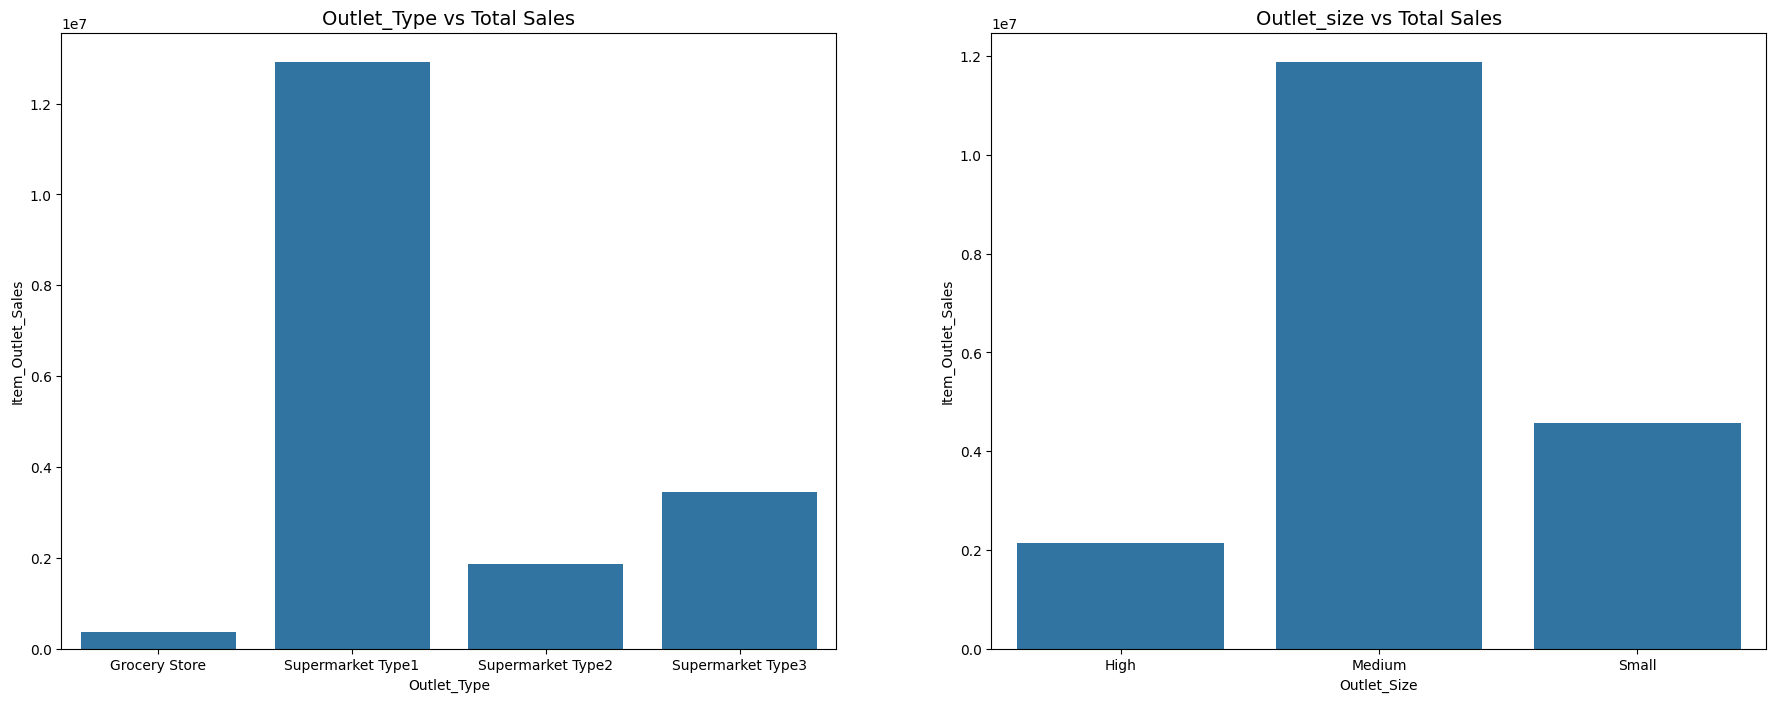

In [37]:
df1 = df.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'sum'})
df2 = df.groupby('Outlet_Size').agg({'Item_Outlet_Sales':'sum'})

plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.barplot(x = df1.index, y = df1.Item_Outlet_Sales, data = df1)
plt.title('Outlet_Type vs Total Sales',fontsize=14)

plt.subplot(1,2,2)
sns.barplot(x = df2.index, y = df2.Item_Outlet_Sales, data = df2)
plt.title('Outlet_size vs Total Sales',fontsize=14)

Observation:
1. Max outlet sales comes from supermarket type 1 followed by type 3 ,type 2 and lowest for grocery store.
2. Based on store size highest sales are from medium size store while big size stores having low sales.

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

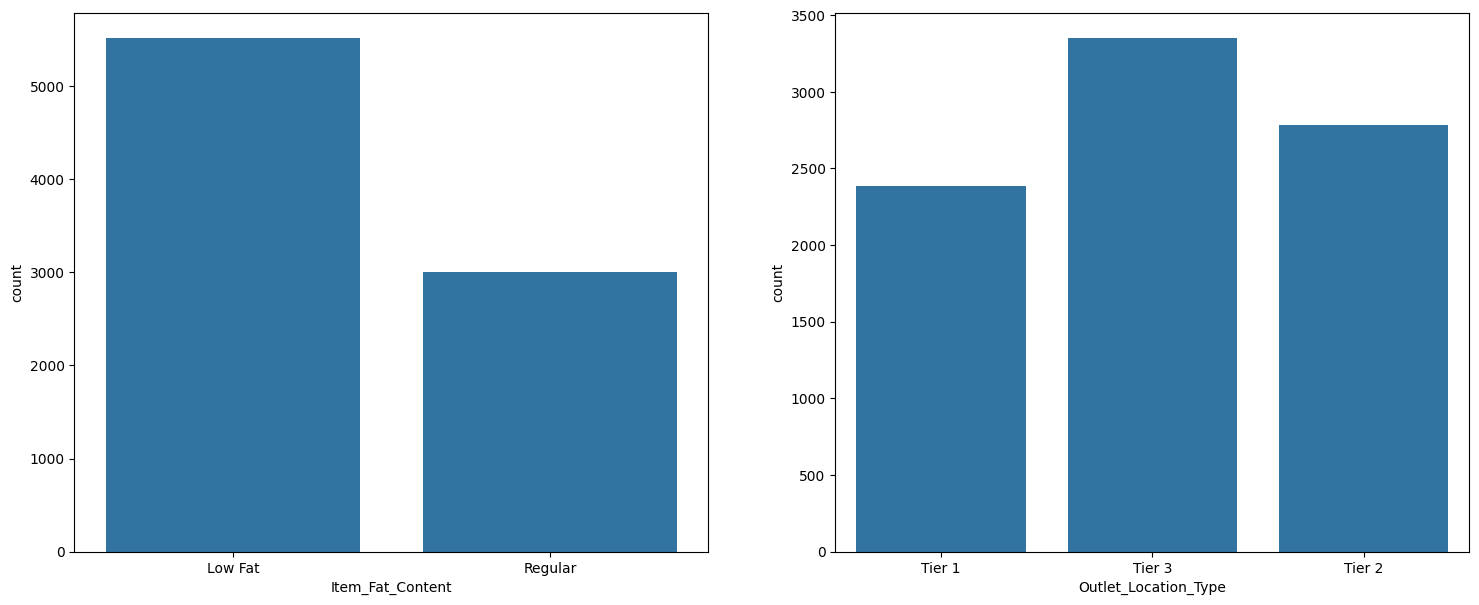

In [38]:
# Item_Fat_Content column
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(x='Item_Fat_Content', data=df)

# Outlet_Size column
plt.subplot(1,2,2)
sns.countplot(x='Outlet_Location_Type', data=df)

Observation:

1. Most of items that are sold are having low fat content means customers prefer low fat content items more than rest.
2. Based on location type stores which are in tier 3 cities giving high sales compare to tier 1/2.

Text(0.5, 1.0, 'Item_Type vs total Sales')

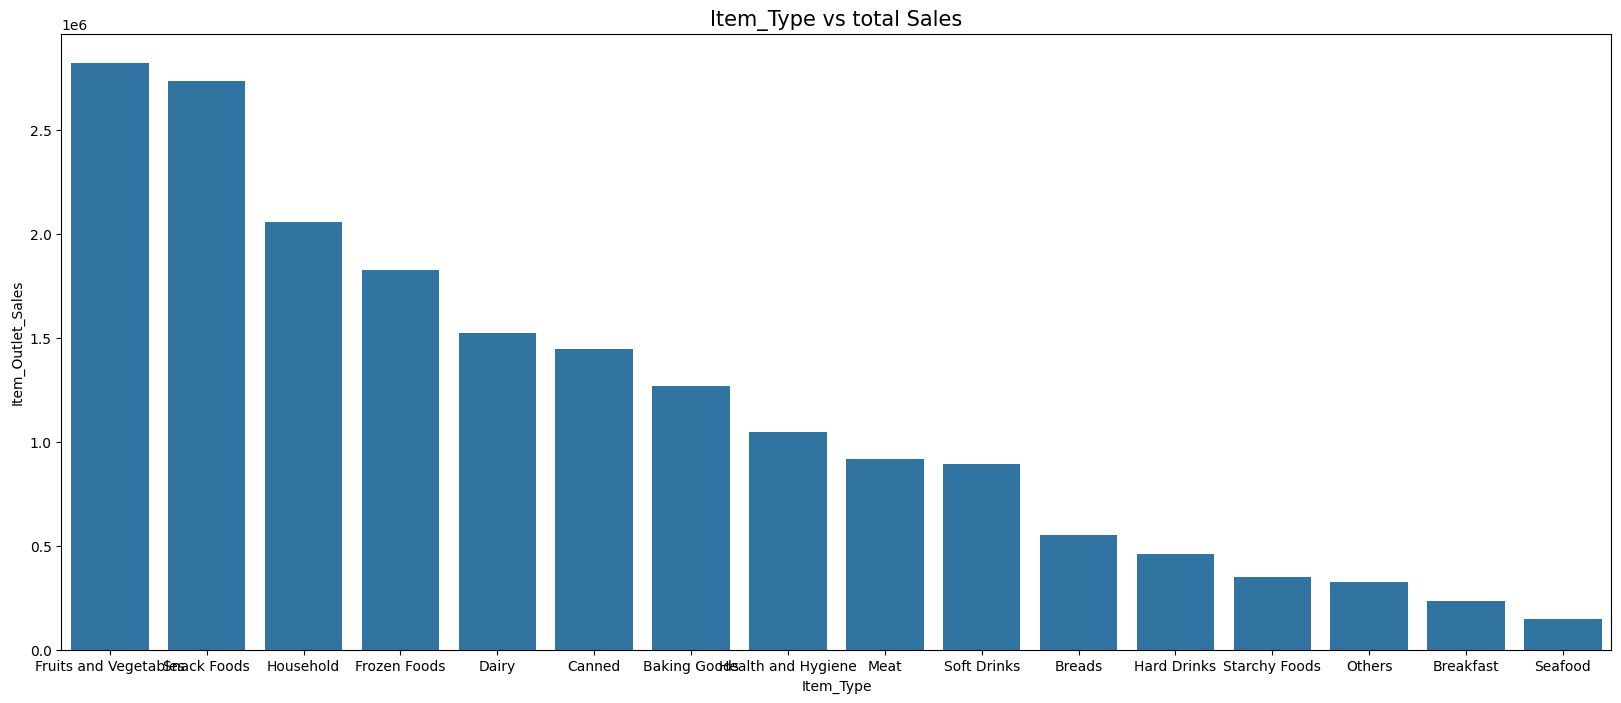

In [39]:
df3 = df.groupby('Item_Type').agg({'Item_Outlet_Sales':'sum'}).sort_values(by=["Item_Outlet_Sales"],ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x = df3.index, y = df3.Item_Outlet_Sales, data = df3)
plt.title('Item_Type vs total Sales',fontsize=15)

Observation: Fruits and vegetables having highest sales followed by snack foods while seafood ,breakfast item types having lowest sales.

## Outlier Treatment

In [40]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

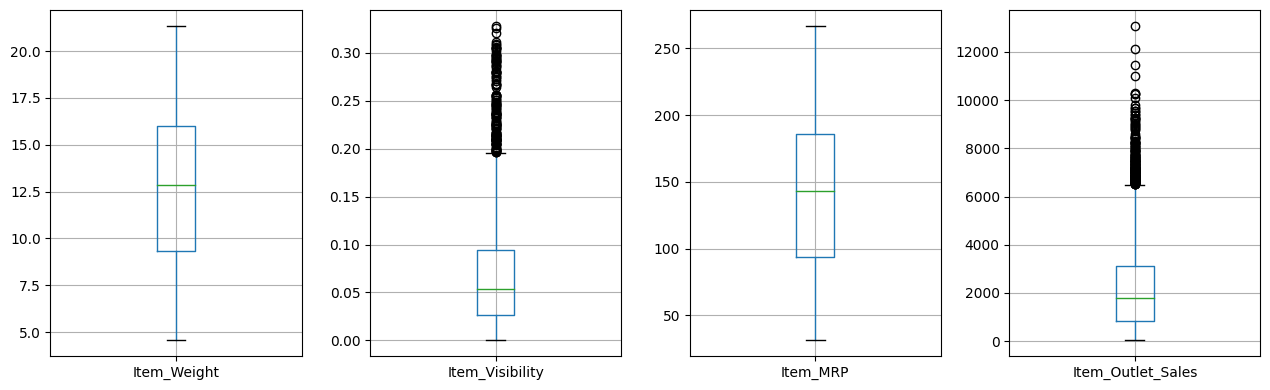

In [41]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(16,4))
for feature, i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    df_num.boxplot(column=feature)
    plt.tight_layout()

##Multicollinearity

In [42]:
## Show the correlation between numericals features.
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


<Axes: >

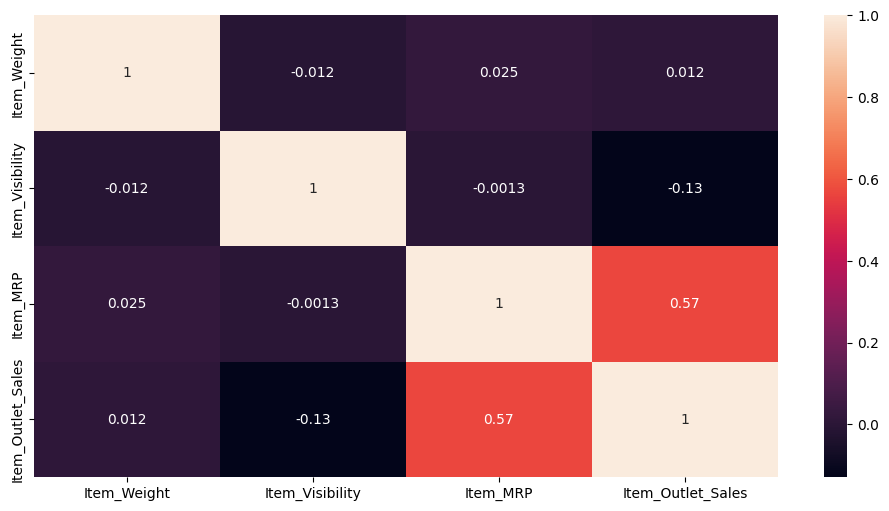

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True)

**variance_inflation_factor**
1. The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression.
2. Among two features whichever having higher VIF value remove(ignore) that feature as its the reductant feature.
3. If VIF > 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [44]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 13.6 MB/s eta 0:00:00


In [45]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [46]:
df_num.shape[1] ## No of columns

4

In [47]:
df_num.values

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, 3.73513800e+03],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, 4.43422800e+02],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, 2.09727000e+03],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, 1.19311360e+03],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, 1.84559760e+03],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, 7.65670000e+02]])

In [48]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

vif

,variables,VIF
0,Item_Weight,4.763826
1,Item_Visibility,2.421090
2,Item_MRP,7.590043
3,Item_Outlet_Sales,3.971706


##Checking distribution of each feature

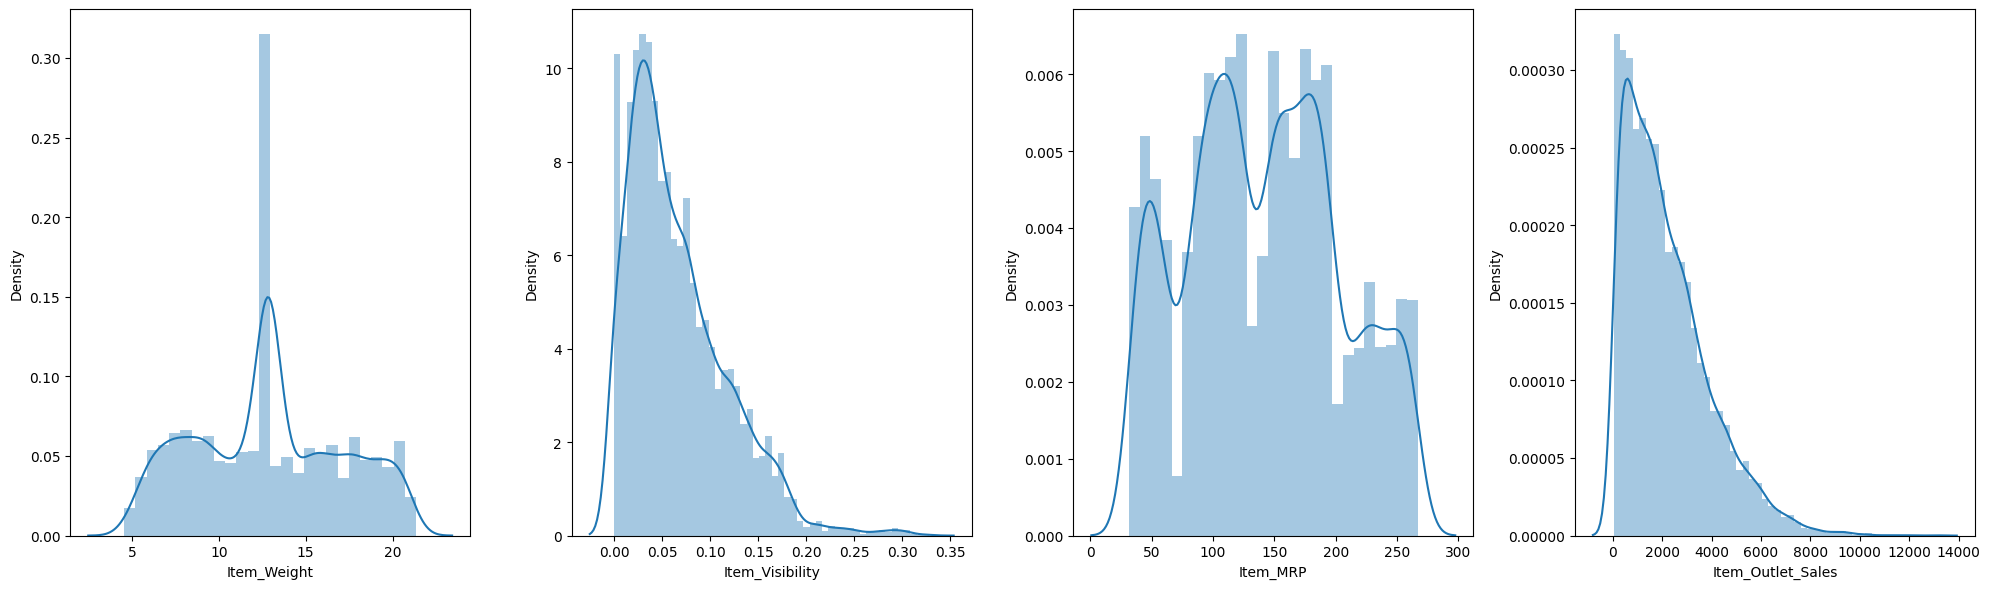

In [49]:
plt.figure(figsize=(20,6))
for feature,i in zip(df_num.columns,range(1,5)):
    plt.subplot(1,4,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

Feature Transformation
1. Right skewed distribution:
To make it close to normal distribution use following two ways.
  1. Lognormal distribution
  Generally its best option to approximate to normal ditsribution.
  2. sqrt distribution
  Use when there is zero values present and cant use lognormal
2. Left skewed distribution:
To make it close to normal use boxcox method.

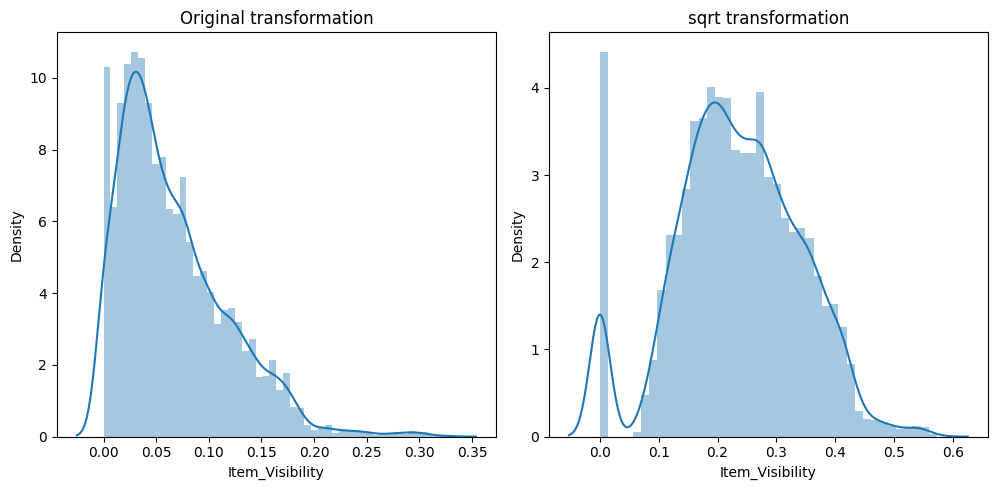

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_Visibility"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.sqrt(df_num["Item_Visibility"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [51]:
right_skewed

{'Item_Visibility': 1.17, 'Item_MRP': 0.13, 'Item_Outlet_Sales': 1.18}

In [52]:
left_skewed

{}

In [53]:
print("original:",stats.skew(df_num["Item_Visibility"]))
print("log-normal:",stats.skew(np.log(df_num["Item_Visibility"])))
print("sqrt:",stats.skew(np.sqrt(df_num["Item_Visibility"])))

original: 1.16688513828559
log-normal: nan
sqrt: -0.09803828864382132


Observation: Using sqrt transformation for Item_Visibility.

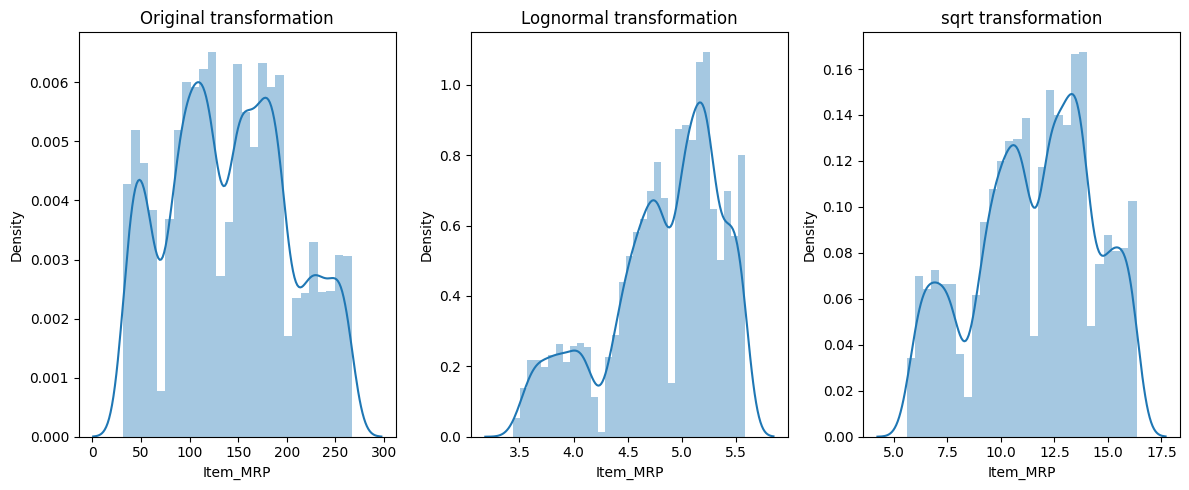

In [54]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_MRP"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.log(df_num["Item_MRP"]))
plt.title("Lognormal transformation")

plt.subplot(1,3,3)
sns.distplot(np.sqrt(df_num["Item_MRP"]))
plt.title("sqrt transformation")

plt.tight_layout()

Observation: No need of transformation

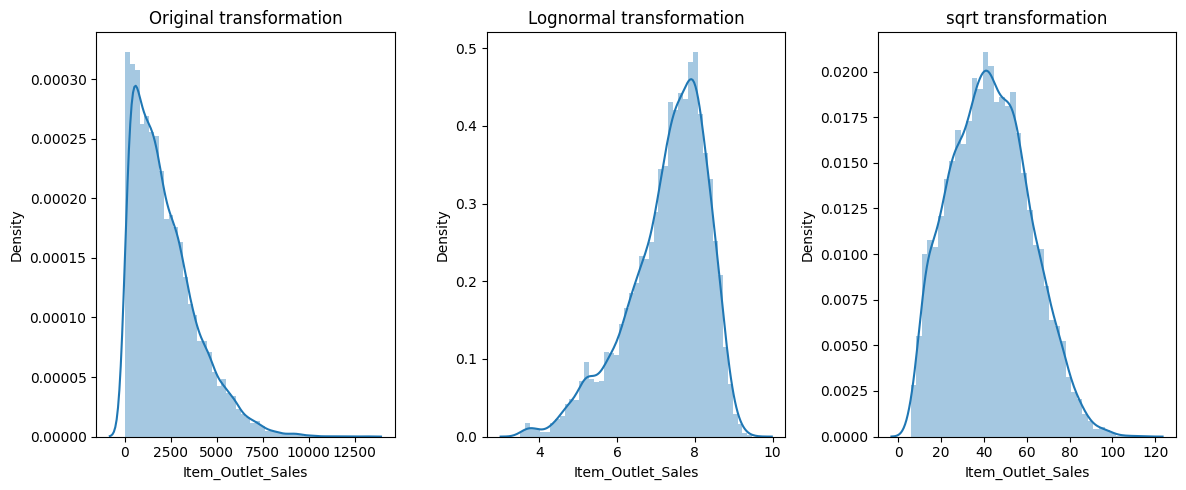

In [55]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_Outlet_Sales"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.log(df_num["Item_Outlet_Sales"]))
plt.title("Lognormal transformation")

plt.subplot(1,3,3)
sns.distplot(np.sqrt(df_num["Item_Outlet_Sales"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [56]:
print("original:",stats.skew(df_num["Item_Outlet_Sales"]))
print("log-normal:",stats.skew(np.log(df_num["Item_Outlet_Sales"])))
print("sqrt:",stats.skew(np.sqrt(df_num["Item_Outlet_Sales"])))

original: 1.1773233539676373
log-normal: -0.8875970959818048
sqrt: 0.23463468979850136


Observation: Use sqrt transformation for Item_Outlet_Sales.

In [57]:
## Feature transformation
df_num["Item_Visibility"] = np.sqrt(df_num["Item_Visibility"])
df_num["Item_Outlet_Sales"] = np.sqrt(df_num["Item_Outlet_Sales"])

## Check feature distribution after transformation

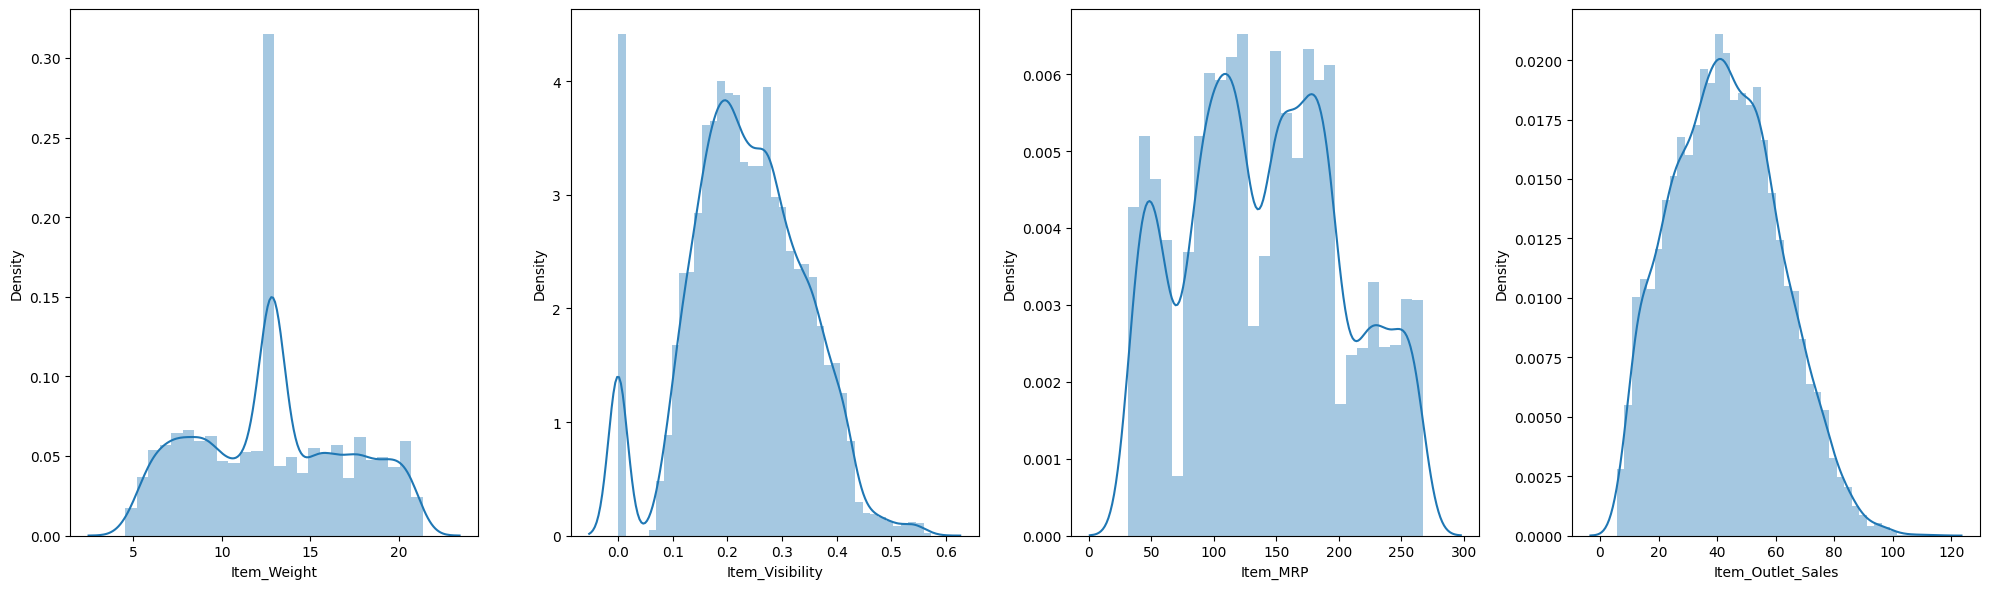

In [58]:
plt.figure(figsize=(20,6))
for feature,i in zip(df_num.columns,range(1,5)):
    plt.subplot(1,4,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

## Data Preprocessing

Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Ordinal data
* Rating ----> good-1 better-2 best-3
* Label Encoding
2. Nominal data
* Gender(M/F), Marital status(M/UM/S)
* One hot encoding

**Types of Encoding**
1. Label Encoding
* Refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.
2. One hot encoding
* Its a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive.
This first requires that the categorical values be mapped to integer values, that is label encoding.
* Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [59]:
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [60]:
df_cat=pd.get_dummies(data=df_cat,columns=["Item_Fat_Content","Item_Type"],drop_first=True)  # ----> one hot encoding
df_cat.head()

,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,OUT049,1999,Medium,Tier 1,Supermarket Type1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,DRC01,OUT018,2009,Medium,Tier 3,Supermarket Type2,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,FDN15,OUT049,1999,Medium,Tier 1,Supermarket Type1,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,FDX07,OUT010,1998,Medium,Tier 3,Grocery Store,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,OUT013,1987,High,Tier 3,Supermarket Type1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [61]:
df_cat["Outlet_Size"].value_counts() ## Ordinal data so use label encoding

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()  ## Creating object from LabelEncoder() class

df_cat["Outlet_Size"] = encoder.fit_transform(df_cat["Outlet_Size"])
df_cat["Outlet_Size"].value_counts()

,count
Outlet_Size,
1,5203
2,2388
0,932


In [64]:
df_cat["Item_Identifier"] = encoder.fit_transform(df_cat["Item_Identifier"])
df_cat["Item_Identifier"].value_counts()

,count
Item_Identifier,
1077,10
413,10
1383,9
1454,9
1320,9
1358,9
1107,9
134,9
1141,9


In [65]:
df_cat["Outlet_Identifier"] = encoder.fit_transform(df_cat["Outlet_Identifier"])
df_cat["Outlet_Identifier"].value_counts()

,count
Outlet_Identifier,
5,935
1,932
6,930
9,930
8,930
7,929
3,928
2,926
0,555


In [66]:
df_cat["Outlet_Location_Type"].value_counts() ## Ordinal data so use label encoding

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [67]:
df_cat["Outlet_Location_Type"] = encoder.fit_transform(df_cat["Outlet_Location_Type"])
df_cat["Outlet_Location_Type"].value_counts()

,count
Outlet_Location_Type,
2,3350
1,2785
0,2388


In [68]:
df_cat["Outlet_Type"].value_counts()  ## Ordinal data so use label encoding

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [69]:
df_cat["Outlet_Type"] = encoder.fit_transform(df_cat["Outlet_Type"])
df_cat["Outlet_Type"].value_counts()

,count
Outlet_Type,
1,5577
0,1083
3,935
2,928


In [70]:
df_cat.head()

,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,9,1999,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,3,2009,1,2,2,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,662,9,1999,1,0,1,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1121,0,1998,1,2,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,1297,1,1987,0,2,1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [71]:
## Combine all features into single dataframe.
df_final=pd.concat([df_num,df_cat], axis= 1)
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.126678,249.8092,61.115775,156,9,1999,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,5.92,0.138846,48.2692,21.057607,8,3,2009,1,2,2,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0.129461,141.6180,45.795961,662,9,1999,1,0,1,...,False,False,False,False,True,False,False,False,False,False
3,19.20,0.000000,182.0950,27.062520,1121,0,1998,1,2,0,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,31.538947,1297,1,1987,0,2,1,...,False,False,False,True,False,False,False,False,False,False


In [72]:
df_final.shape

(8523, 26)

Observation: Now the above dataframe is ready so we can use it for applying any machine learning model to predict output.

**Sales prediction using regression techniques**

In [73]:
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.126678,249.8092,61.115775,156,9,1999,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,5.92,0.138846,48.2692,21.057607,8,3,2009,1,2,2,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0.129461,141.6180,45.795961,662,9,1999,1,0,1,...,False,False,False,False,True,False,False,False,False,False
3,19.20,0.000000,182.0950,27.062520,1121,0,1998,1,2,0,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,31.538947,1297,1,1987,0,2,1,...,False,False,False,True,False,False,False,False,False,False


**Spliting features & target values**

In [74]:
x=df_final.drop(columns="Item_Outlet_Sales",axis=1)

In [75]:
x.shape

(8523, 25)

In [76]:
y=np.array(df_final["Item_Outlet_Sales"]).reshape((-1,1))

In [77]:
y.shape

(8523, 1)

**Splitting dataset into training & test data**

In [78]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=2)

**Scaling Data (Standardization)**

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Linear Regression Model Building**

In [80]:
## Creating instance model of linear regression class
model=linear_model.LinearRegression()

In [81]:
## Fit the training data
model.fit(x_train,y_train)

LinearRegression()

In [82]:
## Predict values using train data
y_train_predict=model.predict(x_train)
y_train_predict

array([[47.30689326],
       [36.49397697],
       [41.80343021],
       ...,
       [47.51558828],
       [46.75819548],
       [53.70298141]])

In [83]:
## Predict values using test data
y_test_predict=model.predict(x_test)
y_test_predict

array([[46.6619296 ],
       [61.21369927],
       [34.71455461],
       ...,
       [39.14346742],
       [25.80477573],
       [65.33113493]])

**Linear Regression Model Evaluation**

In [84]:
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train= r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

In [85]:
print('Slope:' ,model.coef_)

Slope: [[-1.40523936e-01 -8.07309482e-01  1.03813550e+01  2.74539195e-01
   2.48769641e+00  1.38478337e+00 -3.47760106e+00 -2.81352937e+00
   8.32731999e+00  9.50641327e-03  6.33624015e-03  1.78914852e-02
   2.44118795e-01 -1.91939144e-01  5.08847589e-03  2.07660177e-01
   1.31847309e-01 -2.05874203e-01 -1.76964886e-01 -3.24174754e-02
  -3.69569080e-02  1.94047735e-01  2.72838303e-02  4.81551176e-02
  -9.82223061e-03]]


In [86]:
print('Intercept:',model.intercept_)

Intercept: [42.8517176]


In [87]:
print('Linear Regression model:')
print('Train error(MSE):', mse_train)
print('Test error(MSE):', mse_test)
print('Train error(RMSE):', np.sqrt(mse_train))
print('Test error(RMSE):', np.sqrt(mse_test))
print('R2 Score:', r2_test)

Linear Regression model:
Train error(MSE): 143.03119563758048
Test error(MSE): 148.6465602665878
Train error(RMSE): 11.959565027106148
Test error(RMSE): 12.192069564540214
R2 Score: 0.5772749903392109


Observation:
* MSE for test data is 148.64 and R2 score is 0.58.
* Now we check with lasso regression whether MSE value reduces further and we get better predicting model.

# Lasso Regression Model Building

In [88]:
from sklearn import linear_model

lasso_cv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [89]:
# Best alpha parameter
alpha = lasso_cv.alpha_
alpha

0.09649911833160232

In [90]:
lasso = linear_model.Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.09649911833160232)

In [91]:
## Predict values using train data
y_train_predict_lasso=lasso.predict(x_train)
y_train_predict_lasso

array([47.38856139, 35.88776321, 41.14107025, ..., 47.14653531,
       46.31936469, 53.14747738])

In [92]:
## Predict values using test data
y_test_predict_lasso=lasso.predict(x_test)
y_test_predict_lasso

array([46.76393376, 61.36497737, 34.69866675, ..., 38.88242886,
       26.21462334, 65.59248143])

**Lasso Regression Model Evaluation**

In [93]:
mse_train_lasso = mean_squared_error(y_train, y_train_predict_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_predict_lasso)
r2_lasso = r2_score(y_test, y_test_predict_lasso)

In [94]:
print('Slope:' ,lasso.coef_)

Slope: [-0.05211416 -0.73855555 10.28257691  0.          2.72216257  1.23022482
 -3.16880985 -2.20948263  7.98400935  0.          0.          0.
  0.14991852 -0.13758723 -0.          0.11051355  0.         -0.02148167
 -0.         -0.          0.          0.08260912  0.         -0.
 -0.        ]


In [95]:
print('Intercept:',lasso.intercept_)

Intercept: [42.8517176]


In [96]:
print('Lasso Regression model:')
print('Train error(MSE):', mse_train_lasso)
print('Test error(MSE):', mse_test_lasso)
print('Train error(RMSE):', np.sqrt(mse_train_lasso))
print('Test error(RMSE):', np.sqrt(mse_test_lasso))
print('R2 Score:', r2_lasso)

Lasso Regression model:
Train error(MSE): 143.25533745968315
Test error(MSE): 148.49556596422792
Train error(RMSE): 11.96893217708594
Test error(RMSE): 12.185875674904448
R2 Score: 0.5777043919197745


Observation:
* MSE for test data is 134.69 and R2 score is 0.58 which almost same as linear regression.
* Now we check how ridge regression model perfom on given data.

**Ridge Regression Model Building**

In [97]:
from sklearn import linear_model

alphas = np.random.uniform(0, 10, 50)
ridge_cv = linear_model.RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([5.56709658, 2.97459607, 9.19951236, 8.37085107, 2.26882673,
       7.94801898, 2.72859167, 4.33437253, 6.77265496, 4.57007235,
       3.88504798, 2.31410299, 3.43551753, 8.04647625, 9.33146115,
       9.75456245, 9.0890644 , 5.27476398, 7.68633345, 1.31930711,
       8.41276479, 6.81500649, 3.21656213, 8.46691146, 8.75979015,
       1.53647049, 2.36701093, 0.57035901, 4.64854438, 7.09310567,
       6.37384274, 5.67356341, 8.81871898, 6.25490001, 5.18848258,
       1.57710358, 1.8884443 , 4.1235483 , 8.80281327, 6.21443022,
       6.8439534 , 8.3804622 , 9.86548985, 1.58973373, 7.68446655,
       5.38009629, 8.08086584, 2.85909986, 2.34067971, 8.00929294]),
        cv=10)

In [98]:
# Best alpha parameter
alpha = ridge_cv.alpha_
alpha

9.86548985340263

In [99]:
ridge = linear_model.Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=9.86548985340263)

In [100]:
## Predict values using train data
y_train_predict_ridge=ridge.predict(x_train)
y_train_predict_ridge

array([[47.29786489],
       [36.48612433],
       [41.80496412],
       ...,
       [47.45856756],
       [46.77185551],
       [53.67465885]])

In [101]:
## Predict values using test data
y_test_predict_ridge=ridge.predict(x_test)
y_test_predict_ridge

array([[46.65818275],
       [61.20259941],
       [34.74580516],
       ...,
       [39.14216754],
       [25.84051823],
       [65.2905467 ]])

**Ridge Regression Model Evaluation**

In [102]:
mse_train_ridge = mean_squared_error(y_train, y_train_predict_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_predict_ridge)
r2_ridge = r2_score(y_test, y_test_predict_ridge)

In [103]:
print('Slope:' ,ridge.coef_)

Slope: [[-1.40219577e-01 -8.09440131e-01  1.03637293e+01  2.72312000e-01
   2.51996620e+00  1.37665836e+00 -3.45969394e+00 -2.75617525e+00
   8.28588671e+00  1.00548811e-02  6.22326187e-03  1.82331240e-02
   2.44650682e-01 -1.90650191e-01  5.96384625e-03  2.08258241e-01
   1.31574302e-01 -2.04985723e-01 -1.74318266e-01 -3.22199404e-02
  -3.68681023e-02  1.93905899e-01  2.85145765e-02  4.69035054e-02
  -9.35009041e-03]]


In [104]:
print('Intercept:' ,ridge.intercept_)

Intercept: [42.8517176]


In [105]:
print('Ridge Regression model:')
print('Train error(MSE):', mse_train_ridge)
print('Test error(MSE):', mse_test_ridge)
print('Train error(RMSE):', np.sqrt(mse_train_ridge))
print('Test error(RMSE):', np.sqrt(mse_test_ridge))
print('R2 Score:', r2_ridge)

Ridge Regression model:
Train error(MSE): 143.0323126926953
Test error(MSE): 148.66144948080256
Train error(RMSE): 11.959611728341992
Test error(RMSE): 12.192680159866516
R2 Score: 0.5772326479990217


Observation:

* MSE for test data is 148.66 and R2 score is 0.58 which almost same as linear regression and lasso regression results.

# **Model Validation**

In order to validate model we need to check few assumption of linear regression model.

1. Linear Relationship:
  * In linear regression the relationship between the dependent and independent variable to be linear.
  * This can be checked by scatter ploting Actual value Vs Predicted value.
2. The residual error plot should be normally distributed.
3. The mean of residual error should be 0 or close to 0 as much as possible

4. The linear regression require all variables to be multivariate normal.
  * This assumption can best checked with Q-Q plot.
5. Linear regression assumes that there is little or no Multicollinearity in the data.
  * Multicollinearity occurs when the independent variables are too highly correlated with each other.
  * The variance inflation factor VIF identifies correlation between independent variables and strength of that correlation.

  * VIF = 1/(1-R^2) , If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.
6. Homoscedasticity:
  * The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot.
If heteroscedastic,plot would exhibit a funnel shape pattern.



**Check for Linearity and Residual Normality**

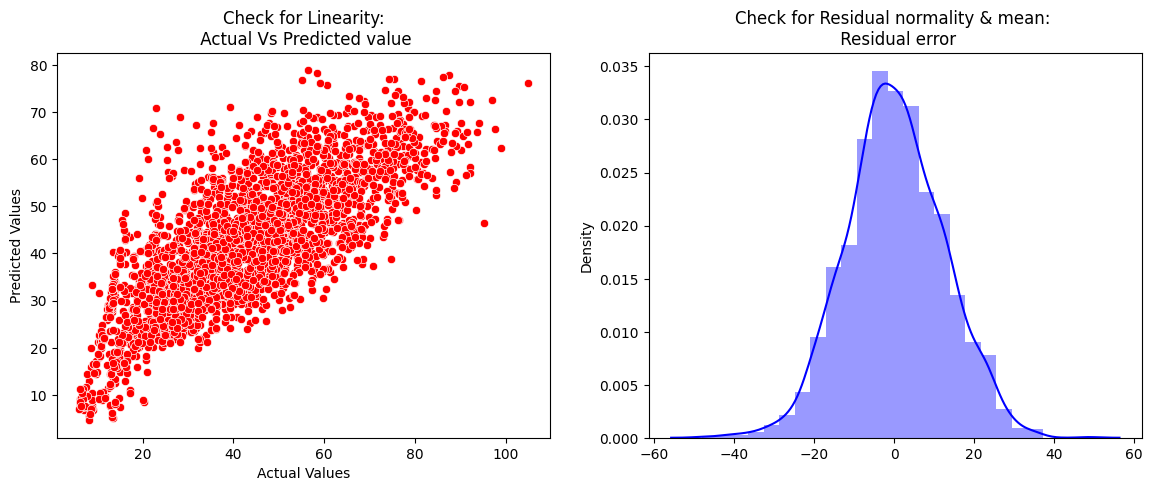

In [111]:
# Check for Linearity
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test.flatten(),y=y_test_predict.flatten(),color='r')
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Check for Residual normality & mean
plt.subplot(1,2,2)
sns.distplot((y_test.flatten() - y_test_predict.flatten()),color='b',bins=25)
plt.title('Check for Residual normality & mean: \n Residual error');

Observation:
* From above scatter plot, we can see linear relationship between the actual and predicted values.
* Residual error is normally distributed with mean zero.

**Check for Multicollinearity**

In [112]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2_test)
VIF

2.3656040620885874

Observation:
* VIF value is less than 5 which means no multicollinearity.

**Check for Homoscedasticity**
* Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present else homoscedasticity obtained.

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

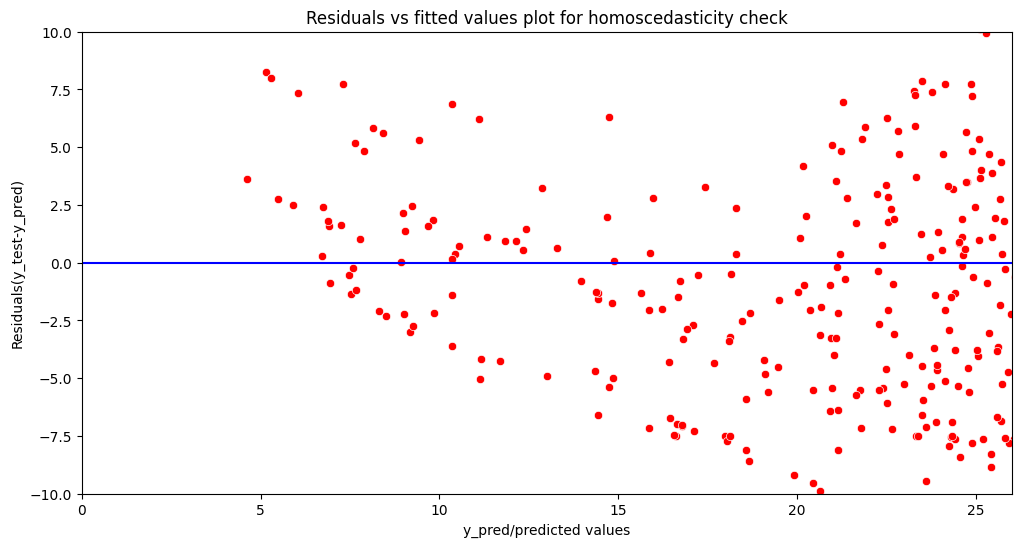

In [115]:
plt.figure(figsize=(12,6))
residuals=(y_test-y_test_predict)
sns.scatterplot(x=y_test_predict.flatten(),y=residuals.flatten(),color='r')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals(y_test-y_pred)')
plt.ylim(-10,10)
plt.xlim(0,26)

sns.lineplot(x=[0,26],y=[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Goldfeld Quandt Test**
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [116]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test)
print(lzip(name, test))
p_value=lzip(name, test)[1][1]

## P-value approach

if ( p_value <= 0.05):
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")

[('F statistic', 0.9017571032591937), ('p-value', 0.9663611233997382)]
P-value approach: Fail to reject null hypothesis


Observation:
  * Fail to reject null hypothesis means error terms are homoscedastic.(Residuals have equal or almost equal variance across the regression line.)